<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Life Expectancy
</font>
</h1>

<br>
<br>
<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Introduction
</font>
</h2>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
The goal of this project is to predict life expectancy index of countries using some of their characteristics like GDP, BMI or disease rates. 
Life Expectancy is a statistical criteria which represents how long individuals can survive in average in each country. 
<br>
<a href="https://fa.wikipedia.org/wiki/%D8%A7%D9%85%DB%8C%D8%AF_%D8%A8%D9%87_%D8%B2%D9%86%D8%AF%DA%AF%DB%8C">Wikipedia: Life Expectancy</a> 
</font>
</p>


<br>
<h2 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Libraries
</font>
</h2>


In [1]:
import numpy as np
import pandas as pd 

<br>
<h2 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Dataset
</font>
</h2>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    This dataset contains 2848 rows and 18 columns, in which first 17 columns are features and the last column is label.
    <br>
    The table bellow provides brief description about the dataset and clarifies each column. each row describes the status of a country in a specific year.
</font>
</p>
<br>

<center>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|column|description|
|:------:|:---:|
|<code>Country</code>|corresponding country|
|<code>Year</code>|year|
|<code>Status</code>|development status|
|<code>Population</code>|country's population|
|<code>Hepatitis B</code>|percentage of individuals which were immuned by Hepatitis B|
|<code>Measles</code>|the number of individuals which were infeceted by Measles|
|<code>Polio</code>|percentage of children (up to 8 years old) which were immuned by Polio|
|<code>Diphtheria</code>|percentage of children (up to 8 years old) which were immuned by Diphteria|
|<code>HIV/AIDS</code>|the number of mortality which caused by HIV/AIDS in children (up to 4 years old) who were borned alive|
|<code>infant deaths</code>|infants mortality|
|<code>under-five deaths</code>|children up to 5 mortality|
|<code>Total expenditure</code>|the ratio of medical-costs to the total expenditures of government in terms of percentage|
|<code>GDP</code>|gross domestic product in terms of US dollars|
|<code>BMI</code>|average body mass index of the entire population of the country|
|<code>thinness 1-19 years</code>|the prevalence of thinness among individuals up to 19 in percentage|
|<code>Alcohol</code>|alcohol consuming amount in people older than 15|
|<code>Schooling</code>|the number of years people study|
|<code>Life expectancy</code>|life expectancy or average life expectancy|
    
</font>
</div>
</center>

<br>
<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
     ---- The test dataset is like train dataset but it doesn't have label.
</font>
</p>

<br>
<br>
<h3 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Train dataset
</font>
</h2>

In [2]:
train_data = pd.read_csv("../data/train.csv")
train_data.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


<br>
<br>
<h3 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Test dataset
</font>
</h2>

In [3]:
test_data = pd.read_csv("../data/test.csv")
test_data.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling
0,Burundi,2015,Developing,119927.0,94.0,9,94.0,94.0,0.7,21,31,NaN,33.681223,18.7,7.3,NaN,10.6
1,Burundi,2014,Developing,989179.0,95.0,0,95.0,95.0,0.7,22,32,7.54,312.748979,18.2,7.4,0.01,10.6
2,Burundi,2013,Developing,96186.0,96.0,0,96.0,96.0,1.0,22,32,8.30,282.755525,17.6,7.4,0.01,10.5
3,Burundi,2012,Developing,931971.0,96.0,49,96.0,96.0,1.2,22,33,8.21,265.285651,17.1,7.5,0.01,10.3
4,Burundi,2011,Developing,94358.0,96.0,129,95.0,96.0,1.5,22,33,8.58,26.479973,16.6,7.6,4.16,9.9


<br>
<br>
<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Preprocessing and feature engineering
</font>
</h2>


<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    split train dataset to train and evaluation data:
</font>
</p>

In [4]:
eval_data = train_data.sample(frac=0.1, random_state=42)
train_data = train_data.drop(eval_data.index)
eval_data

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
1576,Malta,2007,Developed,46724.0,82.0,2,76.0,74.0,0.1,0,0,8.36,19375.569600,66.1,0.7,7.45,14.4,79.6
324,Bosnia and Herzegovina,2011,Developing,3688865.0,88.0,10,89.0,88.0,0.1,0,0,9.71,55.156834,53.7,2.6,4.64,13.4,76.9
2123,Samoa,2004,Developing,178781.0,54.0,0,26.0,55.0,0.1,0,0,4.45,2351.338140,68.9,0.2,3.62,12.4,71.4
2514,Timor-Leste,2013,Developing,1184366.0,82.0,4,82.0,82.0,0.1,2,2,1.29,117.765674,16.6,11.1,0.01,12.5,67.7
2175,Senegal,2000,Developing,988452.0,NaN,5839,49.0,52.0,0.5,27,50,4.63,473.453380,17.5,12.3,0.29,5.2,57.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,Tunisia,2000,Developing,9699197.0,94.0,47,97.0,97.0,0.1,4,5,5.40,2213.914880,48.1,6.6,1.21,12.8,72.9
772,Egypt,2011,Developing,NaN,96.0,26,96.0,96.0,0.1,55,64,5.40,NaN,57.8,2.9,0.22,12.4,74.0
1048,Guinea-Bissau,2007,Developing,1445958.0,NaN,1,76.0,74.0,5.7,5,7,6.10,481.694976,21.3,8.7,2.98,8.8,55.0
1044,Guinea-Bissau,2011,Developing,1596154.0,86.0,0,85.0,86.0,5.7,4,7,5.46,692.699890,23.7,7.8,3.57,9.0,57.1


In [5]:
train_data.isna().sum()

Country                   0
Year                      0
Status                    0
Population              581
Hepatitis B             483
Measles                   0
Polio                    18
Diphtheria               18
HIV/AIDS                  0
infant deaths             0
under-five deaths         0
Total expenditure       194
GDP                     396
BMI                      28
thinness  1-19 years     28
Alcohol                 166
Schooling               143
Life expectancy           0
dtype: int64


<br>
<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    according to the great number of missin values in population and the difficulty of replacing the missing values (it might makes bias), we'll remove <code>Population</code> column. In addition, we'll discard the rows wich has too much missing values (thresh = 14).
</font>
</p>

In [6]:
train_data.drop(columns=["Population"], inplace=True)
train_data.dropna(thresh=14, inplace=True)
train_data.isna().sum()


Country                   0
Year                      0
Status                    0
Hepatitis B             452
Measles                   0
Polio                     7
Diphtheria                7
HIV/AIDS                  0
infant deaths             0
under-five deaths         0
Total expenditure       157
GDP                     365
BMI                      12
thinness  1-19 years     12
Alcohol                 141
Schooling               119
Life expectancy           0
dtype: int64

<br>
<br>
<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    With running the two cells bellow, we'll be able to fill "Hepatitis B" column missing values with the mean of corresponding value for the nearest neighbour country for each country. For exmaple, we can fill Nan values in Finland "Hepatitis B" column by the mean of Sweden values, which is the nearest neighbour that exists in our dataset.
    <br>
    We skipped these cells and apply simpler approach which were implemented in the following.
</font>
</p>

In [7]:
# hepatit_check_nan = train_data.groupby("Country")["Hepatitis B"].agg(lambda x:x.isna().sum())
# countries_data = train_data.groupby("Country").size()
# compare = pd.concat([hepatit_check_nan, countries_data], axis=1).rename(columns={0:"number_of_occurrences"})
# compare[compare["Hepatitis B"] == compare["number_of_occurrences"]]


In [8]:
# train_data["Hepatitis_mean"] = train_data.groupby("Country")["Hepatitis B"].transform(lambda x: x.mean())
# train_data["Hepatitis B"].fillna(train_data["Hepatitis_mean"], inplace=True)

# sweden_value = train_data[train_data['Country'] == 'Sweden'].loc[train_data[train_data['Country'] == 'Sweden'].index[0], 'Hepatitis_mean']
# Austria_value = train_data[train_data['Country'] == 'Austria'].loc[train_data[train_data['Country'] == 'Austria'].index[0], 'Hepatitis_mean']
# Belgium_value = train_data[train_data['Country'] == 'Belgium'].loc[train_data[train_data['Country'] == 'Belgium'].index[0], 'Hepatitis_mean']
# Korea_value = train_data[train_data['Country'] == "Republic of Korea"].loc[train_data[train_data['Country'] == "Republic of Korea"].index[0], 'Hepatitis_mean']

# mask1 = train_data['Country'].isin(['Finland', 'Norway', 'Denmark', 'Iceland'])
# mask2 = train_data['Country'].isin(['Hungary', 'Switzerland', 'Slovenia'])
# mask3 = train_data['Country'].isin(['United Kingdom of Great Britain and Northern Ireland'])
# mask4 = train_data['Country'].isin(['Japan'])


# train_data.loc[mask1, 'Hepatitis B'] = train_data.loc[mask1, 'Hepatitis B'].fillna(sweden_value)
# train_data.loc[mask2, 'Hepatitis B'] = train_data.loc[mask2, 'Hepatitis B'].fillna(Austria_value)
# train_data.loc[mask3, 'Hepatitis B'] = train_data.loc[mask3, 'Hepatitis B'].fillna(Belgium_value)
# train_data.loc[mask4, 'Hepatitis B'] = train_data.loc[mask4, 'Hepatitis B'].fillna(Korea_value)

# train_data["Hepatitis B"].isna().sum()

<br>
<br>
<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
   encoding "Status" column using label encoding:
</font>
</p>

In [9]:
status_map = {"Developing": 0, "Developed": 1}
train_data["Status"] = train_data["Status"].map(status_map)
train_data["Status"]

0       0
1       0
2       0
3       0
4       0
       ..
2842    0
2844    0
2845    0
2846    0
2847    0
Name: Status, Length: 2522, dtype: int64

<br>
<br>
<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    Filling missing values in each column with two steps approach:
    <br>
    1- At first, fill with the nearest non-nan value with the same country
    <br>
    2- If all of values for a country are nan, fill with the median of column
</font>
</p>

In [10]:
fill_columns = train_data.drop(columns=["Country", "Year", "Status", "Life expectancy"]).columns
median = {}
mean = {}
for col in fill_columns:
    train_data[col] = train_data.groupby("Country")[col].apply(lambda group:group.ffill().bfill())
    median[col] = train_data[col].median()
    mean[col] = train_data[col].mean()
    train_data[col] = train_data[col].fillna(median[col])
train_data.isna().sum()

Country                 0
Year                    0
Status                  0
Hepatitis B             0
Measles                 0
Polio                   0
Diphtheria              0
HIV/AIDS                0
infant deaths           0
under-five deaths       0
Total expenditure       0
GDP                     0
BMI                     0
thinness  1-19 years    0
Alcohol                 0
Schooling               0
Life expectancy         0
dtype: int64

In [11]:
train_data

,Country,Year,Status,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,Zimbabwe,2005,0,65.0,420,69.0,68.0,30.3,28,43,6.44,444.765750,27.5,9.0,4.14,9.3,44.6
2844,Zimbabwe,2003,0,7.0,998,7.0,68.0,36.7,26,41,6.52,453.351155,26.7,9.8,4.06,9.5,44.5
2845,Zimbabwe,2002,0,73.0,304,73.0,71.0,39.8,25,40,6.53,57.348340,26.3,1.2,4.43,10.0,44.8
2846,Zimbabwe,2001,0,76.0,529,76.0,75.0,42.1,25,39,6.16,548.587312,25.9,1.6,1.72,9.8,45.3


<br>
<br>
<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Scaling
</font>
</h2>

<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    In this part, we'll scale our columns with the most appropriate approach. At first, we will draw kde plot for every single numerical column to see the distribution. After that, we'll make decision to use which scaling method. 
</font>
</p>



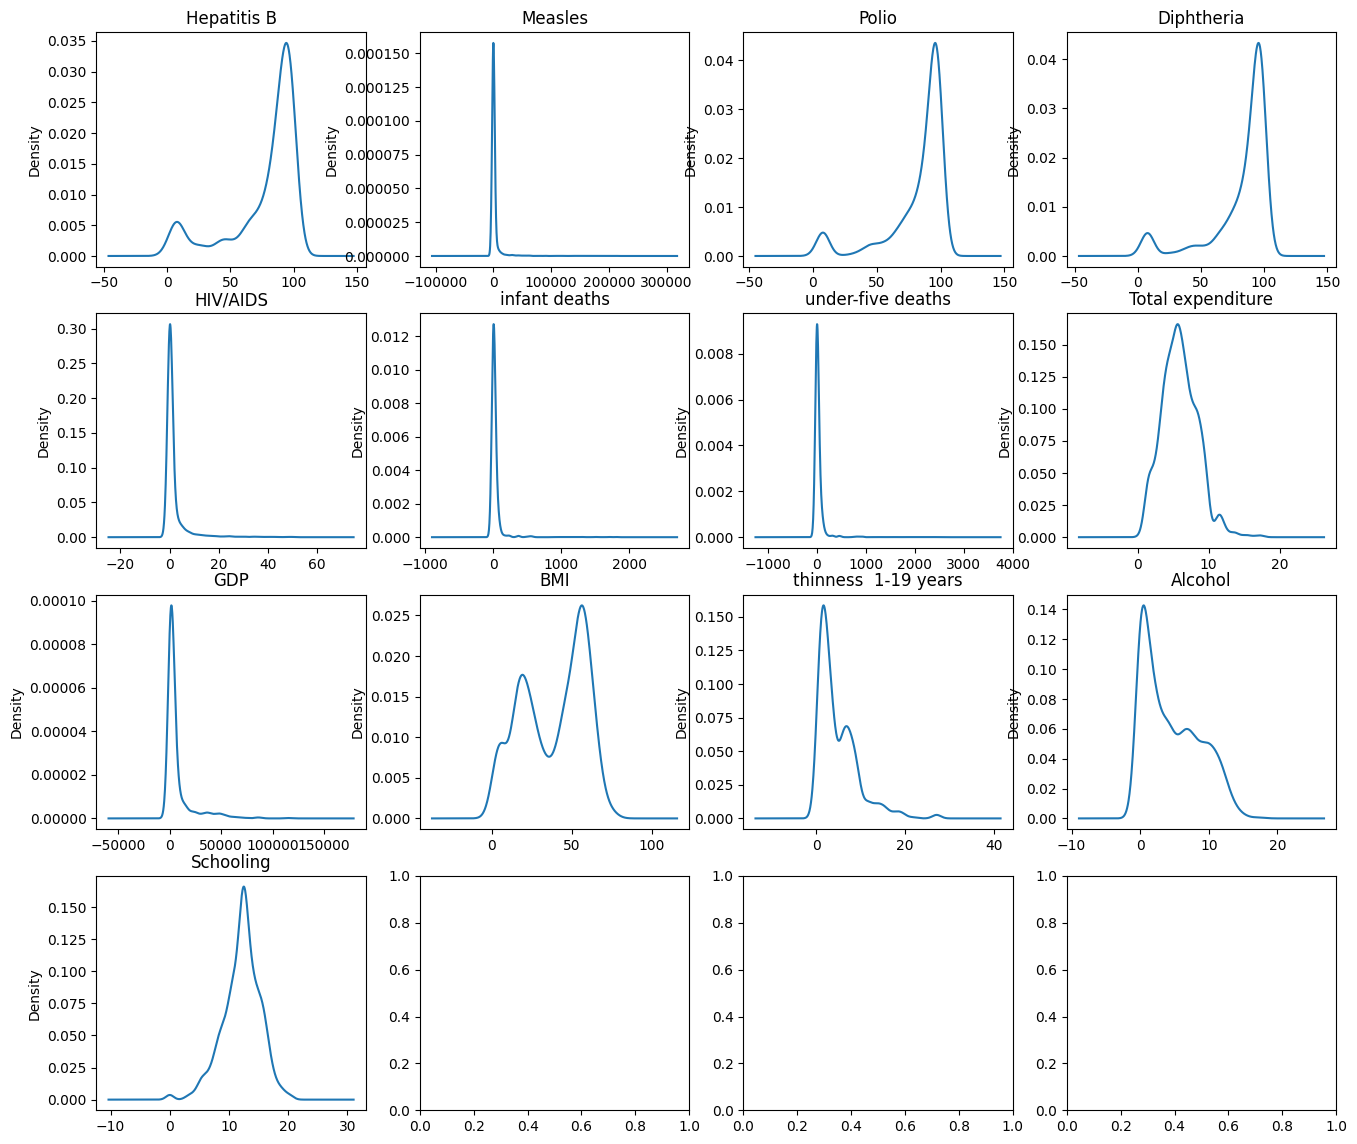

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4,4, figsize=(16, 14))
axes = axes.flatten()
numerical_columns = train_data.drop(columns=["Country", "Year", "Status", "Life expectancy"]).columns
for i, col in enumerate(numerical_columns):
    train_data[col].plot(ax=axes[i], kind="kde")
    axes[i].set_title(col)

In [13]:
zero_variance = train_data[numerical_columns].var() == 0
zero_variance

Hepatitis B             False
Measles                 False
Polio                   False
Diphtheria              False
HIV/AIDS                False
infant deaths           False
under-five deaths       False
Total expenditure       False
GDP                     False
BMI                     False
thinness  1-19 years    False
Alcohol                 False
Schooling               False
dtype: bool

<br>
<br>
<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    According to the distributions of the data, which are approximately normal distribution, we are going to use standard scaling method.
</font>
</p>

In [14]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
train_data

,Country,Year,Status,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,0,-0.445443,-0.092516,-3.230704,-0.731799,-0.319644,0.267317,0.253354,0.881484,-0.458037,-0.988004,2.773027,-1.127915,-0.650625,65.0
1,Afghanistan,2014,0,-0.553744,-0.154141,-1.035921,-0.857681,-0.319644,0.283533,0.271185,0.889429,-0.455967,-1.013184,2.840257,-1.127915,-0.682493,59.9
2,Afghanistan,2013,0,-0.481543,-0.159912,-0.867092,-0.773760,-0.319644,0.299748,0.289017,0.869567,-0.454580,-1.038365,2.885077,-1.127915,-0.714360,59.9
3,Afghanistan,2012,0,-0.373242,0.059498,-0.656055,-0.647878,-0.319644,0.324072,0.312792,1.024495,-0.451798,-1.063546,2.929897,-1.127915,-0.746227,59.5
4,Afghanistan,2011,0,-0.337142,0.080536,-0.613848,-0.605917,-0.319644,0.340288,0.336567,0.766281,-0.495946,-1.083690,2.997127,-1.127915,-0.841829,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,Zimbabwe,2005,0,-0.445443,-0.160843,-0.571640,-0.605917,5.736754,-0.008352,0.015602,0.198212,-0.468192,-0.564969,0.935408,-0.117201,-0.905563,44.6
2844,Zimbabwe,2003,0,-2.539262,-0.107038,-3.188497,-0.605917,7.020230,-0.024568,0.003714,0.229992,-0.467567,-0.605258,1.114688,-0.136779,-0.841829,44.5
2845,Zimbabwe,2002,0,-0.156640,-0.171641,-0.402811,-0.480035,7.641913,-0.032676,-0.002230,0.233964,-0.496396,-0.625403,-0.812571,-0.046231,-0.682493,44.8
2846,Zimbabwe,2001,0,-0.048339,-0.150696,-0.276189,-0.312193,8.103162,-0.032676,-0.008173,0.086981,-0.460634,-0.645547,-0.722931,-0.709436,-0.746227,45.3


<br>
<br>
<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
   As the last part of preprocessing, we'll remove "Country" and "Year" columns wich we don't need in the future.
</font>
</p>

In [15]:
train_data.drop(columns=["Country", "Year"], inplace=True)
train_data

,Status,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,0,-0.445443,-0.092516,-3.230704,-0.731799,-0.319644,0.267317,0.253354,0.881484,-0.458037,-0.988004,2.773027,-1.127915,-0.650625,65.0
1,0,-0.553744,-0.154141,-1.035921,-0.857681,-0.319644,0.283533,0.271185,0.889429,-0.455967,-1.013184,2.840257,-1.127915,-0.682493,59.9
2,0,-0.481543,-0.159912,-0.867092,-0.773760,-0.319644,0.299748,0.289017,0.869567,-0.454580,-1.038365,2.885077,-1.127915,-0.714360,59.9
3,0,-0.373242,0.059498,-0.656055,-0.647878,-0.319644,0.324072,0.312792,1.024495,-0.451798,-1.063546,2.929897,-1.127915,-0.746227,59.5
4,0,-0.337142,0.080536,-0.613848,-0.605917,-0.319644,0.340288,0.336567,0.766281,-0.495946,-1.083690,2.997127,-1.127915,-0.841829,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,0,-0.445443,-0.160843,-0.571640,-0.605917,5.736754,-0.008352,0.015602,0.198212,-0.468192,-0.564969,0.935408,-0.117201,-0.905563,44.6
2844,0,-2.539262,-0.107038,-3.188497,-0.605917,7.020230,-0.024568,0.003714,0.229992,-0.467567,-0.605258,1.114688,-0.136779,-0.841829,44.5
2845,0,-0.156640,-0.171641,-0.402811,-0.480035,7.641913,-0.032676,-0.002230,0.233964,-0.496396,-0.625403,-0.812571,-0.046231,-0.682493,44.8
2846,0,-0.048339,-0.150696,-0.276189,-0.312193,8.103162,-0.032676,-0.008173,0.086981,-0.460634,-0.645547,-0.722931,-0.709436,-0.746227,45.3


<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Model
</font>
</h2>

<p style=" text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    After preprocessing and feature engineering, it's time to train our model.
</font>
</p>

<br>
<br>
<h3 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Model training
</font>
</h3>



<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    At first, we should apply the same preprocessing which used for training dataset on the evaluation data.
</font>
</p>

In [16]:
eval_data.drop(columns=["Population"], inplace=True)
eval_data.isna().sum()

Country                  0
Year                     0
Status                   0
Hepatitis B             59
Measles                  0
Polio                    1
Diphtheria               1
HIV/AIDS                 0
infant deaths            0
under-five deaths        0
Total expenditure       27
GDP                     46
BMI                      4
thinness  1-19 years     4
Alcohol                 22
Schooling               17
Life expectancy          0
dtype: int64

In [17]:
status_map = {"Developing": 0, "Developed": 1}
eval_data["Status"] = eval_data["Status"].map(status_map)
eval_data["Status"]

1576    1
324     0
2123    0
2514    0
2175    0
       ..
2591    0
772     0
1048    0
1044    0
889     0
Name: Status, Length: 285, dtype: int64

In [18]:
fill_columns = eval_data.drop(columns=["Country", "Year", "Status", "Life expectancy"]).columns
for col in fill_columns:
    eval_data[col] = eval_data[col].fillna(mean[col])
eval_data.isna().sum()

Country                 0
Year                    0
Status                  0
Hepatitis B             0
Measles                 0
Polio                   0
Diphtheria              0
HIV/AIDS                0
infant deaths           0
under-five deaths       0
Total expenditure       0
GDP                     0
BMI                     0
thinness  1-19 years    0
Alcohol                 0
Schooling               0
Life expectancy         0
dtype: int64

In [19]:
eval_data[fill_columns] = scaler.transform(eval_data[fill_columns])
eval_data

,Country,Year,Status,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
1576,Malta,2007,1,0.168263,-0.199754,-0.276189,-0.354153,-0.319644,-0.235374,-0.239981,0.960934,0.909976,1.378977,-0.924621,0.692839,0.719667,79.6
324,Bosnia and Herzegovina,2011,0,0.384865,-0.199009,0.272507,0.233296,-0.319644,-0.235374,-0.239981,1.497224,-0.496556,0.754497,-0.498831,0.005161,0.400994,76.9
2123,Samoa,2004,0,-0.842546,-0.199940,-2.386557,-1.151406,-0.319644,-0.235374,-0.239981,-0.592319,-0.329393,1.519988,-1.036671,-0.244458,0.082322,71.4
2514,Timor-Leste,2013,0,0.168263,-0.199568,-0.022945,-0.018468,-0.319644,-0.219158,-0.228094,-1.847634,-0.491998,-1.113907,1.406018,-1.127915,0.114189,67.7
2175,Senegal,2000,0,-0.022879,0.343605,-1.415788,-1.277288,-0.239427,-0.016460,0.057208,-0.520814,-0.466104,-1.068582,1.674938,-1.059392,-2.212121,57.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,Tunisia,2000,0,0.601467,-0.195565,0.610166,0.610942,-0.319644,-0.202942,-0.210262,-0.214930,-0.339398,0.472474,0.397568,-0.834245,0.209791,72.9
772,Egypt,2011,0,0.673668,-0.197520,0.567958,0.568981,-0.319644,0.210561,0.140422,-0.214930,0.058445,0.960978,-0.431601,-1.076523,0.082322,74.0
1048,Guinea-Bissau,2007,0,-0.022879,-0.199847,-0.276189,-0.354153,0.803397,-0.194834,-0.198375,0.063146,-0.465504,-0.877209,0.868178,-0.401082,-1.064900,55.0
1044,Guinea-Bissau,2011,0,0.312664,-0.199940,0.103677,0.149375,0.803397,-0.202942,-0.198375,-0.191095,-0.450143,-0.756342,0.666488,-0.256694,-1.001165,57.1


In [20]:
eval_data.drop(columns=["Country", "Year"], inplace=True)
eval_data

,Status,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
1576,1,0.168263,-0.199754,-0.276189,-0.354153,-0.319644,-0.235374,-0.239981,0.960934,0.909976,1.378977,-0.924621,0.692839,0.719667,79.6
324,0,0.384865,-0.199009,0.272507,0.233296,-0.319644,-0.235374,-0.239981,1.497224,-0.496556,0.754497,-0.498831,0.005161,0.400994,76.9
2123,0,-0.842546,-0.199940,-2.386557,-1.151406,-0.319644,-0.235374,-0.239981,-0.592319,-0.329393,1.519988,-1.036671,-0.244458,0.082322,71.4
2514,0,0.168263,-0.199568,-0.022945,-0.018468,-0.319644,-0.219158,-0.228094,-1.847634,-0.491998,-1.113907,1.406018,-1.127915,0.114189,67.7
2175,0,-0.022879,0.343605,-1.415788,-1.277288,-0.239427,-0.016460,0.057208,-0.520814,-0.466104,-1.068582,1.674938,-1.059392,-2.212121,57.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,0,0.601467,-0.195565,0.610166,0.610942,-0.319644,-0.202942,-0.210262,-0.214930,-0.339398,0.472474,0.397568,-0.834245,0.209791,72.9
772,0,0.673668,-0.197520,0.567958,0.568981,-0.319644,0.210561,0.140422,-0.214930,0.058445,0.960978,-0.431601,-1.076523,0.082322,74.0
1048,0,-0.022879,-0.199847,-0.276189,-0.354153,0.803397,-0.194834,-0.198375,0.063146,-0.465504,-0.877209,0.868178,-0.401082,-1.064900,55.0
1044,0,0.312664,-0.199940,0.103677,0.149375,0.803397,-0.202942,-0.198375,-0.191095,-0.450143,-0.756342,0.666488,-0.256694,-1.001165,57.1


In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly_transformer.fit_transform(train_data.drop(columns=["Life expectancy"]))
x_val_trans = poly_transformer.transform(eval_data.drop(columns=["Life expectancy"]))
y_train = train_data["Life expectancy"]
y_val = eval_data["Life expectancy"]

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_trans, y_train)
y_pred = model.predict(x_val_trans)

<br>
<br>
<h3 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
model evalutation (r2 score)
</font>
</h3>

In [23]:
from sklearn.metrics import r2_score

print(r2_score(y_val, y_pred))

0.873687244793037


<br>
<br>
<h2 align=lef style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 Data prediction
</font>
</h2>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    predicting labels for test dataset using the trained model.
</font>
</p>

<center>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|colums|description|
|:------:|:---:|
|<code>Life expectancy</code>|predicted life expectancy|
    
</font>
</div>
</center>


<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    We should apply the same preprocessing which used for training dataset on the test data.
</font>
</p>

In [24]:
test_data.drop(columns=["Population"], inplace=True)
status_map = {"Developing": 0, "Developed": 1}
test_data["Status"] = test_data["Status"].map(status_map)
fill_columns = test_data.drop(columns=["Country", "Year", "Status"]).columns
for col in fill_columns:
    test_data[col] = test_data[col].fillna(mean[col])
test_data[fill_columns] = scaler.transform(test_data[fill_columns])
test_data.drop(columns=["Country", "Year"], inplace=True)
test_data

,Status,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling
0,0,0.601467,-0.199103,0.483544,0.485060,-0.199318,-0.065108,-0.055724,0.000344,-0.498119,-1.008148,0.554438,0.000000,-0.491289
1,0,0.637567,-0.199940,0.525751,0.527021,-0.199318,-0.057000,-0.049780,0.635188,-0.477803,-1.033329,0.576848,-1.127915,-0.491289
2,0,0.673668,-0.199940,0.567958,0.568981,-0.139156,-0.057000,-0.049780,0.937099,-0.479987,-1.063546,0.576848,-1.127915,-0.523156
3,0,0.673668,-0.195379,0.567958,0.568981,-0.099047,-0.057000,-0.043836,0.901347,-0.481259,-1.088726,0.599258,-1.127915,-0.586891
4,0,0.673668,-0.187932,0.525751,0.568981,-0.038884,-0.057000,-0.043836,1.048330,-0.498644,-1.113907,0.621668,-0.112307,-0.714360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,-2.575363,-0.071012,-0.993714,-0.857681,-0.038884,-0.146187,-0.150824,0.972852,-0.454171,-1.728315,-0.745341,-0.988422,-1.447307
76,0,-0.373242,0.159662,-0.867092,-0.605917,-0.058938,-0.146187,-0.156768,0.337250,-0.457739,0.044403,-0.745341,-0.985975,-1.574776
77,0,-2.575363,1.440284,-1.204751,-0.899642,-0.058938,-0.146187,-0.156768,0.694776,-0.463322,0.009150,-0.745341,-0.981080,-1.670378
78,0,-0.662045,0.174556,-1.289165,-1.151406,-0.078993,-0.146187,-0.156768,0.293552,-0.461302,-0.026103,-0.745341,-0.963950,-1.765980


In [25]:
x_test_trans = poly_transformer.transform(test_data)
test_predict = model.predict(x_test_trans)
submission = pd.DataFrame(test_predict).rename(columns={0: "Life expectancy"})
submission

,Life expectancy
0,65.637039
1,65.496720
2,64.969782
3,64.318384
4,63.516003
...,...
75,56.892300
76,63.345561
77,61.336986
78,62.477864


<br>
<br>
<h2 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>Saving cell</b>
</font>
</h2>


<p style="text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    Run the following cell to create the <code>result.zip</code> file. Note that before running the following cell, you have saved the changes applied to the netbook (<code>ctrl+s</code>).
</font>
</p>


In [26]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)


joblib.dump(poly_transformer, 'poly_transformer')
joblib.dump(model, 'model')
submission.to_csv('submission.csv', index=False)

file_names = ['poly_transformer', 'model', 'submission.csv', 'life_expectancy.ipynb']
compress(file_names)

File Paths:
['poly_transformer', 'model', 'submission.csv', 'life_expectancy.ipynb']
